In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [3]:
daten = pd.read_hdf('../data/data.hdf5', key='Daten')
daten.shape

(40000, 189)

In [4]:
x = daten.iloc[:,:daten.shape[1]-3]
y = daten['type'].values

In [5]:
# Noch andere Skaler ausprobieren...
scaler = StandardScaler()
x = scaler.fit_transform(x)

bis hier ist alles das alte übernommen...

In [6]:
#Daten splitten in 5 Teile
#Mir fällt leider nichts besseres ein als train-test-split...

x_1, x_temp, y_1, y_temp = train_test_split(x,y, test_size = 0.8, random_state = 42, stratify = y)
x_2, x_temp, y_2, y_temp = train_test_split(x_temp,y_temp, test_size = 0.75, random_state = 42, stratify = y_temp)
x_3, x_temp, y_3, y_temp = train_test_split(x_temp,y_temp, test_size = (2/3), random_state = 42, stratify = y_temp)
x_4, x_5, y_4, y_5 = train_test_split(x_temp,y_temp, test_size = 0.5, random_state = 42, stratify = y_temp)
print(y_1.shape)
print(x_2.shape)
print(x_3.shape)
print(x_4.shape)
print(x_5.shape)

(8000,)
(8000, 186)
(8000, 186)
(8000, 186)
(8000, 186)


In [9]:
anzahl = [5,7,15,17,20,22,25,27,30,32,35,37,40,50,60,70,80,90,100,110,120,130] #featuranzahlen (gleichen wie bisher, nur anderer Name)
split = [1,2,3,4,5]


In [10]:
# Die gesplitteten Datensätze in eine Liste packen

x_split = [x_1, x_2, x_3, x_4, x_5]
y_split = [y_1, y_2, y_3, y_4, y_5]
print(x_split[0])

[[ 0.1636082  -0.00336184  0.26195391 ...  0.838158    1.31066026
  -1.29391666]
 [-0.67387577 -0.74149006 -1.11514598 ...  0.53309278 -1.42231713
   0.02823135]
 [-0.25513378 -0.33887467 -0.72168887 ...  0.69075334 -0.83811892
   0.95215803]
 ...
 [ 0.0874733   0.33215099  0.85213958 ...  1.47745287 -0.52328553
  -1.37005254]
 [-0.06479652 -0.40597723 -0.1315032  ... -1.50178881 -0.27584177
   1.28910677]
 [ 2.14311578  3.01625361  1.83578236 ...  0.09589262  0.1019798
  -1.05406816]]


In [11]:
#Featureselection

feat_sel = [] #beinhaltet später Array der Indices der ausgewählten Features für jede Anzahl

for m in anzahl:
    
    feat_sel_k = [] #beinhaltet später Array der Indices der ausgewählten Features
    sel = SelectKBest(k=m)
    
    for j in range(0, len(x_split)):
        
        temp = sel.fit(x_split[j], y_split[j])
        feat_sel_k.append(sel.get_support(indices=True)) #Speichert Indices der ausgewwählten Features
        
    feat_sel.append(feat_sel_k)

/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 16  17  18  20  31  33  35  44  45  47  60  62  64  72  73  74  76  88
  92  95 103 105 107 115 116 117 119 156 157 159 168 169 171 179 180 182] are constant.
  UserWarning)
/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 16  17  18  20  31  33  35  44  45  47  60  62  64  72  73  74  76  88
  92  95 103 105 107 115 116 117 119 156 157 159 168 169 171 179 180 182] are constant.
  UserWarning)
/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/

/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 16  17  18  20  31  33  35  44  45  47  60  62  64  72  73  74  76  88
  92  95 103 105 107 115 116 117 119 156 157 159 168 169 171 179 180 182] are constant.
  UserWarning)
/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 16  17  18  20  31  33  35  44  45  47  60  62  64  72  73  74  76  88
  92  95 103 105 107 115 116 117 119 156 157 159 168 169 171 179 180 182] are constant.
  UserWarning)
/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/

/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 16  17  18  20  31  33  35  44  45  47  60  62  64  72  73  74  76  88
  92  95 103 105 107 115 116 117 119 156 157 159 168 169 171 179 180 182] are constant.
  UserWarning)
/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 16  17  18  20  31  33  35  44  45  47  60  62  64  72  73  74  76  88
  92  95 103 105 107 115 116 117 119 156 157 159 168 169 171 179 180 182] are constant.
  UserWarning)
/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/

/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 16  17  18  20  31  33  35  44  45  47  60  62  64  72  73  74  76  88
  92  95 103 105 107 115 116 117 119 156 157 159 168 169 171 179 180 182] are constant.
  UserWarning)
/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 16  17  18  20  31  33  35  44  45  47  60  62  64  72  73  74  76  88
  92  95 103 105 107 115 116 117 119 156 157 159 168 169 171 179 180 182] are constant.
  UserWarning)
/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/

/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 16  17  18  20  31  33  35  44  45  47  60  62  64  72  73  74  76  88
  92  95 103 105 107 115 116 117 119 156 157 159 168 169 171 179 180 182] are constant.
  UserWarning)
/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 16  17  18  20  31  33  35  44  45  47  60  62  64  72  73  74  76  88
  92  95 103 105 107 115 116 117 119 156 157 159 168 169 171 179 180 182] are constant.
  UserWarning)
/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/

/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 16  17  18  20  31  33  35  44  45  47  60  62  64  72  73  74  76  88
  92  95 103 105 107 115 116 117 119 156 157 159 168 169 171 179 180 182] are constant.
  UserWarning)
/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 16  17  18  20  31  33  35  44  45  47  60  62  64  72  73  74  76  88
  92  95 103 105 107 115 116 117 119 156 157 159 168 169 171 179 180 182] are constant.
  UserWarning)
/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/

In [12]:
len(feat_sel[0])

5

In [13]:
# x_sel[0] für einzelne anzahlen
# x_sel[0][0] vorne: anzahlen; hinten: Split

jaccard = [] # beinhaltet später J in Abhängigkeit von k

for n in range(0, len(anzahl)):
    jaccard_dach = [] # beinhaltet später die einzelnen J(F_i, F_j) für die Summe
    
    for i in range(0,len(feat_sel[0])): #entspricht sum von 1 bis L (0 bis 5)
        for j in range(i+1,len(feat_sel[0])): # entspricht sum von i+1 bis L
            
            # berechne jeweils J(F_i, F_j)
            #anhängen an Liste jaccard_dach
            jaccard_dach.append(jaccard_similarity_score(feat_sel[n][i], feat_sel[n][j], normalize = True))
            
    #aufsummieren der einzelnen J und mal den Faktor 2/(l(l-1)) nehmen
    #anhängen des fertigen J an jaccard
    jaccard.append(np.sum(np.array(jaccard_dach))*(2/5/4))

In [14]:
len(jaccard)
len(anzahl)

22

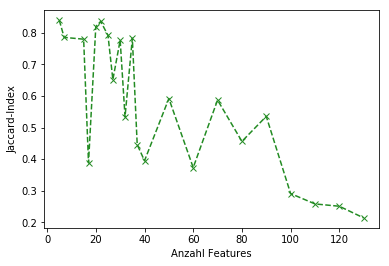

In [16]:
plt.plot(anzahl, jaccard, color = 'forestgreen', marker = 'x', linestyle = '--')
plt.xlabel(r'Anzahl Features')
plt.ylabel(r'Jaccard-Index')
plt.savefig('jaccard.png')